<a href="https://colab.research.google.com/github/Balakrishnaaa/603/blob/main/IMAGE_PROCESSING_BASICS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN**

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import keras

In [ ]:
from google.colab import drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]


array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (10,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

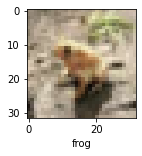

In [ ]:
plot_sample(X_train, y_train, 6000)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=30)

Epoch 1/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2662 - accuracy: 0.9051
Epoch 2/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2426 - accuracy: 0.9117
Epoch 3/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2360 - accuracy: 0.9154
Epoch 4/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2199 - accuracy: 0.9212
Epoch 5/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2166 - accuracy: 0.9226
Epoch 6/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2017 - accuracy: 0.9273
Epoch 7/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1932 - accuracy: 0.9303
Epoch 8/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1886 - accuracy: 0.9322
Epoch 9/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1706 - accuracy: 0.9395
Epoch 10/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.170

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 3.0231 - accuracy: 0.6615


[3.0230937004089355, 0.6614999771118164]

# MOBILENET

In [ ]:
mobilenet=tf.keras.applications.MobileNet(
    input_shape=None,
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.001,
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",

)

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
for layer in mobilenet.layers:
  layer.trainalbe = False

In [ ]:
mobilenet_model = keras.Sequential()
mobilenet_model.add(mobilenet)

In [ ]:
mobilenet_model.add(keras.layers.Dense(units=64,activation="relu"))
mobilenet_model.add(keras.layers.Dense(units=128,activation="relu"))
mobilenet_model.add(keras.layers.Dense(units=1,activation="sigmoid"))

In [ ]:
mobilenet_model.summary()

In [ ]:
mobilenet_model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
mobilenet_model.fit(X_train, y_train, epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 25s 14ms/step - loss: nan - accuracy: 0.1000
Epoch 2/10
1563/1563 [==============================] - 21s 13ms/step - loss: nan - accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 21s 14ms/step - loss: nan - accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: nan - accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: nan - accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 22s 14ms/step - loss: nan - accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 21s 14ms/step - loss: nan - accuracy: 0.1000
Epoch 8/10
1563/1563 [==============================] - 22s 14ms/step - loss: nan - accuracy: 0.1000
Epoch 9/10
1563/1563 [==============================] - 22s 14ms/step - loss: nan - accuracy: 0.1000
Epoch 10/10
1563/1563 [==============================] - 23s 15ms/step - loss: nan - accuracy: 0.1000


In [ ]:
mobilenet_model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: nan - accuracy: 0.1000


[nan, 0.10000000149011612]

# RESNET

In [ ]:
resnet50=tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,

)

In [ ]:
for layer in resnet50.layers:
  layer.trainable = False

In [ ]:
resnet_model = keras.Sequential()
resnet_model.add(resnet50)

In [ ]:
resnet_model.add(keras.layers.Dense(units=64,activation="relu"))
resnet_model.add(keras.layers.Dense(units=128,activation="relu"))
resnet_model.add(keras.layers.Dense(units=1,activation="sigmoid"))

In [ ]:
resnet_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 dense_15 (Dense)            (None, None, None, 64)    131136    
                                                                 
 dense_16 (Dense)            (None, None, None, 128)   8320      
                                                                 
 dense_17 (Dense)            (None, None, None, 1)     129       
                                                                 
Total params: 23,727,297
Trainable params: 139,585
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
resnet_model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
resnet_model.fit(X_train, y_train, epochs=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 31s 18ms/step - loss: nan - accuracy: 0.1000


In [ ]:
resnet_model.evaluate(X_test,)

313/313 [==============================] - 2s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

# VGG16

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
vgg16 = VGG16(
    input_shape=None,
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classes=1000,
)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg16.layers:
  layer.trainalbe = False

In [ ]:
vgg16_model = keras.Sequential()
vgg16_model.add(vgg16)

In [ ]:
vgg16_model.add(keras.layers.Dense(units=64,activation="relu"))
vgg16_model.add(keras.layers.Dense(units=128,activation="relu"))
vgg16_model.add(keras.layers.Dense(units=1,activation="sigmoid"))

In [ ]:
vgg16_model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
vgg16_model.fit(X_train, y_train, epochs=1)

1563/1563 [==============================] - 51s 32ms/step - loss: nan - accuracy: 0.1000


**EDGE DETECTION**

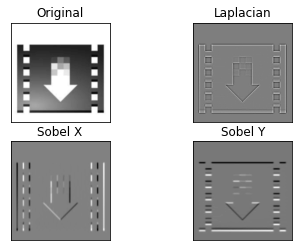

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# loading image
#img0 = cv2.imread('/download.jpg',)
img0 = cv2.imread('/images.jpg',)


# remove noise
img = cv2.GaussianBlur(gray,(3,3),0)

# convolute with proper kernels
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # y

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()
